I'm unclear if we should use the given notebook or create our own.

In [2]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline
import os
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


In [3]:
#generate the distribution
dist_n = np.random.randn(1000)
threshold = scipy.stats.anderson(dist_n, dist='norm')[1][scipy.stats.anderson(dist_n, dist='norm')[2]==[1.0]]



In [4]:
#create empty arrays
narray = range(1,100,1)
ks_b = np.zeros(len(narray))
ad_b = np.zeros(len(narray))
kl_b = np.zeros(len(narray))
chi2_b = np.zeros(len(narray))


def mynorm (x, mu, var):
    return scipy.stats.norm.cdf(x, loc=mu, scale=var)

In [5]:
p=0.4
for i in (narray):
    n=i
    
    dist = np.random.binomial(n, p, 1000)
    #run the tests. 
  
    ks_b[i-1] = scipy.stats.kstest(dist, mynorm, args=(n*p, n*p*(1.0-p)))[0]
 
    ad_b[i-1] = scipy.stats.anderson(dist, dist='norm')[0]
    
    
    
    mybins=np.linspace(min(dist),max(dist), 10) 
    bincenters = mybins[:-1]+0.5*(mybins[1]-mybins[0])
    
    
    kl_b [i-1] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0], scipy.stats.norm.pdf(bincenters, loc=n*p, scale=n*p*(1.0-p)))
    


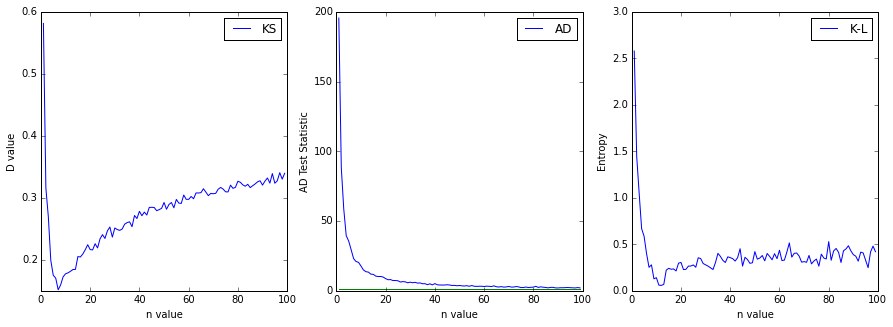

In [10]:

fig = pl.figure(figsize = (15,5))
fig.add_subplot(131)
pl.plot(narray, ks_b, label='KS')
pl.legend()
pl.xlabel('n value')
pl.ylabel('D value')

fig.add_subplot(132)
pl.plot(narray, ad_b,  label='AD')
pl.plot([narray[0], narray[-1]],[threshold, threshold])
pl.plot()
pl.plot()
pl.legend()
pl.xlabel('n value')
pl.ylabel('AD Test Statistic')

fig.add_subplot(133)
pl.plot(narray, kl_b, label='K-L ')
pl.xlabel('n value')
pl.ylabel('Entropy')
pl.legend()

As the n increases for our generated sample, the KS test statistic rapidly decreases making it appear more like a normal 
distribution. The Anderson test statistic decreased and then plateaud as n increased. Entropy followed a trend similar to the KS test. 

In [11]:
#poisson distirbution
p=0.4
for i in (narray):
    #n=i
    
    dist = np.random.poisson(i, 1000)
    #run the tests. 
  
    ks_b[i-1] = scipy.stats.kstest(dist, mynorm, args=(n*p, n*p*(1.0-p)))[0]
 
    ad_b[i-1] = scipy.stats.anderson(dist, dist='norm')[0]
    
    
    
    mybins=np.linspace(min(dist),max(dist), 10) 
    bincenters = mybins[:-1]+0.5*(mybins[1]-mybins[0])
    
    #when i was coding this up something was wrong. i put some plots in to figure out what... just so you know.
    
    kl_b [i-1] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0], scipy.stats.norm.pdf(bincenters, loc=n*p, scale=n*p*(1.0-p)))
    
print ad_b[0]

62.5350752689


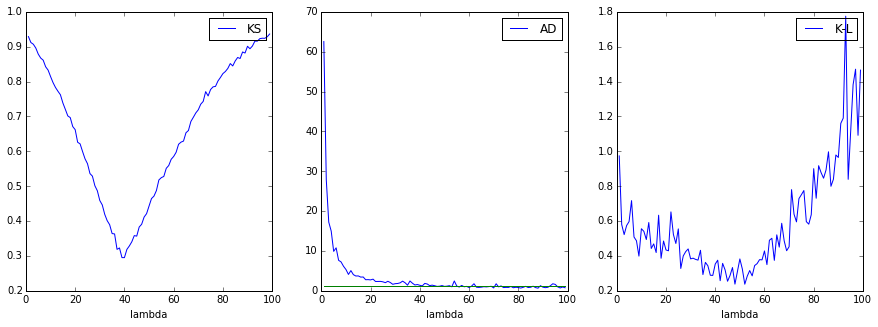

In [14]:
fig = pl.figure(figsize = (15,5))
fig.add_subplot(131)
pl.plot(narray, ks_b, label='KS')
pl.legend()
pl.xlabel('lambda')
pl.ylabel('D')

fig.add_subplot(132)
pl.plot(narray, ad_b,  label='AD')
pl.plot([narray[0], narray[-1]],[threshold, threshold])
pl.plot()
pl.plot()
pl.legend()
pl.xlabel('lambda')
pl.yabel('Anderson Test Statistic')

fig.add_subplot(133)
pl.plot(narray, kl_b, label='K-L ')
pl.xlabel('lambda')
pl.ylabel('Entropy')
pl.legend()

As the lambda increases for our generated sample, the KS test statistic decreased and then ultimately increased, making it appear less like a normal 
distribution. The Anderson test statistic decreased as lambda increased. Entropy increased (generally) as n increased. The AD test 
differed from the others. Essentially, a greater lambda makes a poisson distribution look less like a Gaussian.